In [1]:
import sys
sys.path.append("c:\\Users\\Lenovo\\myFiles\\nauka\\studia\\sem6\\wybrane zagadnienia sztucznej inteligencji\\laby\\analiza_danych")

In [ ]:
import matplotlib.pyplot as plt

from corrected_app.general.data_processing import denormalize_data
from corrected_app.general.distance_calculation import get_euclidean_distance, get_manhattan_distance
from corrected_app.general.results_analysis import get_cluster_size, get_avg_distance_from_centroid_in_a_cluster, get_max_distance_from_centroid_in_a_cluster
from corrected_app.top_baby_names.top_baby_names_loop import top_baby_names_loop
from corrected_app.top_baby_names.top_baby_names_normalization import top_baby_names_denormalize_row

c:\Users\Lenovo\myFiles\nauka\studia\sem6\wybrane zagadnienia sztucznej inteligencji\laby\analiza_danych\corrected_app\top_baby_names\top_baby_names_loop.py:36: SyntaxWarning: invalid escape sequence '\L'
  "c:\\Users\Lenovo\\myFiles\\nauka\\studia\\sem6\\wybrane zagadnienia sztucznej inteligencji\\laby\\analiza_danych\\raw_data\\top_baby_names_by_state_midi.txt"
c:\Users\Lenovo\myFiles\nauka\studia\sem6\wybrane zagadnienia sztucznej inteligencji\laby\analiza_danych\corrected_app\top_baby_names\top_baby_names_loop.py:53: SyntaxWarning: invalid escape sequence '\L'
  "c:\\Users\Lenovo\\myFiles\\nauka\\studia\\sem6\\wybrane zagadnienia sztucznej inteligencji\\laby\\analiza_danych\\raw_data\\top_baby_names_by_state_midi.txt"


## Check the influence of number of clusters

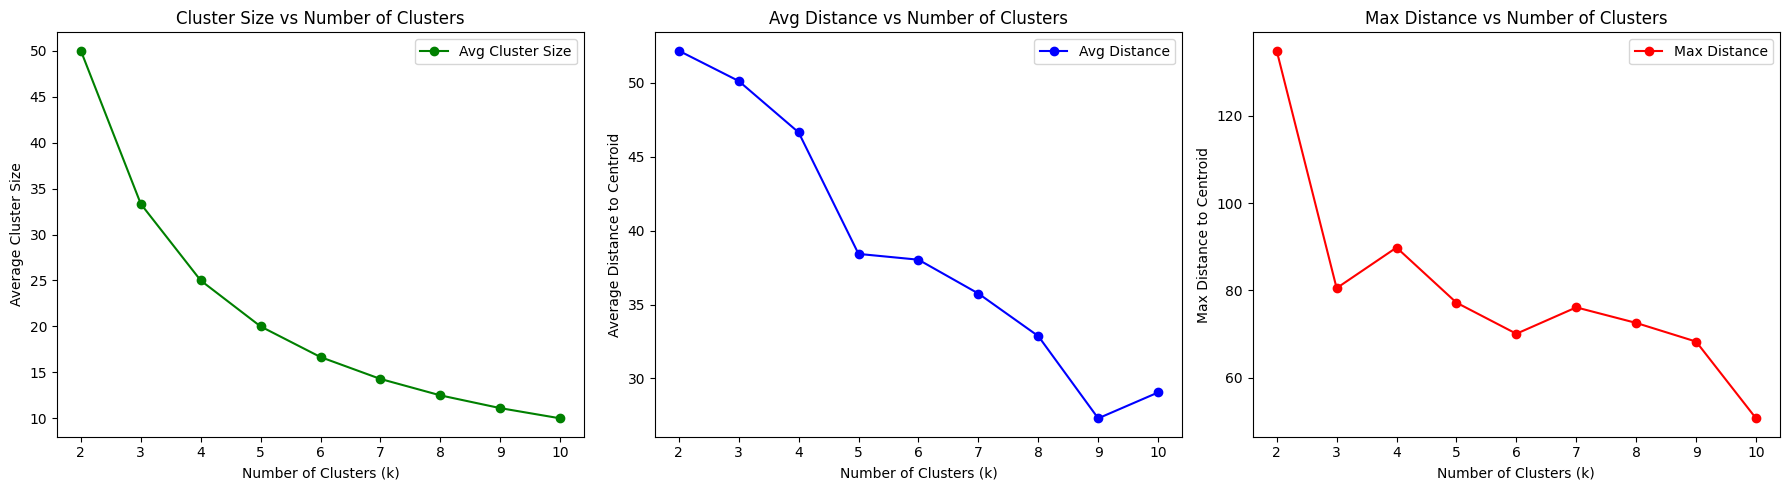

In [42]:
# results for different number of clusters

results = []

for k in range(2, 11):
    clusters, centroids = top_baby_names_loop(no_of_iterations=10, no_of_clusters=k, calculate_distance_function=get_euclidean_distance)
    
    cluster_sizes = [get_cluster_size(cluster) for cluster in clusters]
    avg_distances = [get_avg_distance_from_centroid_in_a_cluster(cluster, centroids[i], [1], get_euclidean_distance) for i, cluster in enumerate(clusters)]
    max_distances = [get_max_distance_from_centroid_in_a_cluster(cluster, centroids[i], [1], get_euclidean_distance) for i, cluster in enumerate(clusters)]

    results.append({
        "k": k,
        "avg_cluster_size": sum(cluster_sizes) / len(cluster_sizes),
        "avg_distance": sum(avg_distances) / len(avg_distances),
        "max_distance": max(max_distances)
    })

fig, axs = plt.subplots(1, 3, figsize=(18, 5))
ks = [res["k"] for res in results]

# avg cluster size vs number of clusters
avg_cluster_sizes = [res["avg_cluster_size"] for res in results]
axs[0].plot(ks, avg_cluster_sizes, marker='o', linestyle='-', color='g', label="Avg Cluster Size")
axs[0].set_xlabel("Number of Clusters (k)")
axs[0].set_ylabel("Average Cluster Size")
axs[0].set_title("Cluster Size vs Number of Clusters")
axs[0].legend()

# avg distance to centroid vs number of clusters
avg_distances = [res["avg_distance"] for res in results]
axs[1].plot(ks, avg_distances, marker='o', linestyle='-', color='b', label="Avg Distance")
axs[1].set_xlabel("Number of Clusters (k)")
axs[1].set_ylabel("Average Distance to Centroid")
axs[1].set_title("Avg Distance vs Number of Clusters")
axs[1].legend()

# max distance to centroid vs number of clusters
max_distances = [res["max_distance"] for res in results]
axs[2].plot(ks, max_distances, marker='o', linestyle='-', color='r', label="Max Distance")
axs[2].set_xlabel("Number of Clusters (k)")
axs[2].set_ylabel("Max Distance to Centroid")
axs[2].set_title("Max Distance vs Number of Clusters")
axs[2].legend()

plt.tight_layout()
plt.show()


**Conclusion**: Based on the rate of change of slope of average distance from a centroid vs number of clusters, the optimal number of clusters seem to be 5 or 6.


## Check the influence of number of iterations

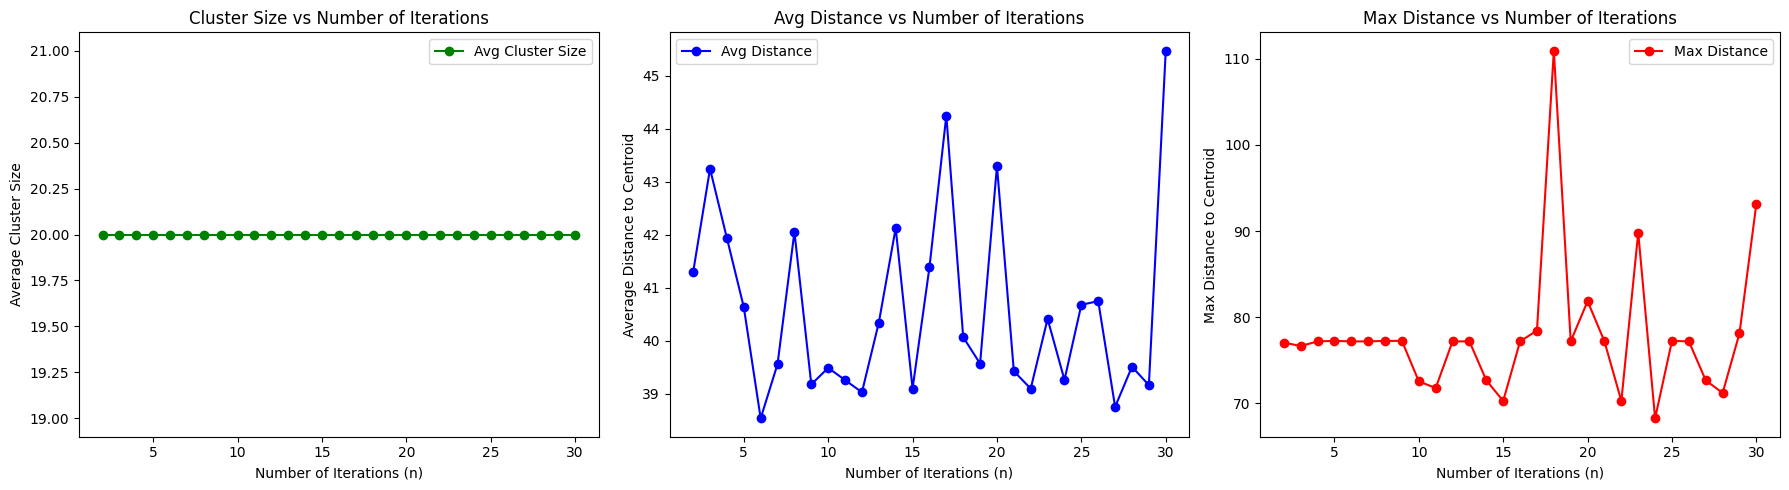

In [ ]:
# results for different number of iterations

results = []

for n in range(2, 31):
    clusters, centroids = top_baby_names_loop(no_of_iterations=n, no_of_clusters=5, calculate_distance_function=get_euclidean_distance)
    
    cluster_sizes = [get_cluster_size(cluster) for cluster in clusters]
    avg_distances = [get_avg_distance_from_centroid_in_a_cluster(cluster, centroids[i], [1], get_euclidean_distance) for i, cluster in enumerate(clusters)]
    max_distances = [get_max_distance_from_centroid_in_a_cluster(cluster, centroids[i], [1], get_euclidean_distance) for i, cluster in enumerate(clusters)]

    results.append({
        "n": n,
        "avg_cluster_size": sum(cluster_sizes) / len(cluster_sizes),
        "avg_distance": sum(avg_distances) / len(avg_distances),
        "max_distance": max(max_distances)
    })

fig, axs = plt.subplots(1, 3, figsize=(18, 5))
ns = [res["n"] for res in results]

# avg cluster size vs number of clusters
avg_cluster_sizes = [res["avg_cluster_size"] for res in results]
axs[0].plot(ns, avg_cluster_sizes, marker='o', linestyle='-', color='g', label="Avg Cluster Size")
axs[0].set_xlabel("Number of Iterations (n)")
axs[0].set_ylabel("Average Cluster Size")
axs[0].set_title("Cluster Size vs Number of Iterations")
axs[0].legend()

# avg distance to centroid vs number of clusters
avg_distances = [res["avg_distance"] for res in results]
axs[1].plot(ns, avg_distances, marker='o', linestyle='-', color='b', label="Avg Distance")
axs[1].set_xlabel("Number of Iterations (n)")
axs[1].set_ylabel("Average Distance to Centroid")
axs[1].set_title("Avg Distance vs Number of Iterations")
axs[1].legend()

# max distance to centroid vs number of clusters
max_distances = [res["max_distance"] for res in results]
axs[2].plot(ns, max_distances, marker='o', linestyle='-', color='r', label="Max Distance")
axs[2].set_xlabel("Number of Iterations (n)")
axs[2].set_ylabel("Max Distance to Centroid")
axs[2].set_title("Max Distance vs Number of Iterations")
axs[2].legend()

plt.tight_layout()
plt.show()

**Conclusion**: The number of iterations doesn't have any stable impact on the metrics - it points to issues with how the algorithm is structured, for example the initial centroids might be chosen wrongly.

## Check the influence of distance calculating method

In [ ]:
# results for euclidean vs manhattan distance calculation

results = []

clusters, centroids = top_baby_names_loop(no_of_iterations=10, no_of_clusters=5, calculate_distance_function=get_euclidean_distance)

cluster_sizes = [get_cluster_size(cluster) for cluster in clusters]
avg_distances = [get_avg_distance_from_centroid_in_a_cluster(cluster, centroids[i], [1], get_euclidean_distance) for i, cluster in enumerate(clusters)]
max_distances = [get_max_distance_from_centroid_in_a_cluster(cluster, centroids[i], [1], get_euclidean_distance) for i, cluster in enumerate(clusters)]

results.append({
    "method": "Euclidean",
    "avg_cluster_size": sum(cluster_sizes) / len(cluster_sizes),
    "avg_distance": sum(avg_distances) / len(avg_distances),
    "max_distance": max(max_distances)
})

clusters, centroids = top_baby_names_loop(no_of_iterations=10, no_of_clusters=5, calculate_distance_function=get_manhattan_distance)

cluster_sizes = [get_cluster_size(cluster) for cluster in clusters]
avg_distances = [get_avg_distance_from_centroid_in_a_cluster(cluster, centroids[i], [1], get_manhattan_distance) for i, cluster in enumerate(clusters)]
max_distances = [get_max_distance_from_centroid_in_a_cluster(cluster, centroids[i], [1], get_manhattan_distance) for i, cluster in enumerate(clusters)]

results.append({
    "method": "Manhattan",
    "avg_cluster_size": sum(cluster_sizes) / len(cluster_sizes),
    "avg_distance": sum(avg_distances) / len(avg_distances),
    "max_distance": max(max_distances)
})

for result in results:
    print(f"Method: {result["method"]}")
    print(f"\tAvg cluster size: {result["avg_cluster_size"]}")
    print(f"\tAvg distance from centroid: {result["avg_distance"]}")
    print(f"\tMax distance from centroid: {result["max_distance"]}")

Method: Euclidean
	Avg cluster size: 20.0
	Avg distance from centroid: 42.4940451437745
	Max distance from centroid: 76.09594010195289
Method: Manhattan
	Avg cluster size: 20.0
	Avg distance from centroid: 66.45047043130978
	Max distance from centroid: 129.23466666666667


**Conclusion**: The Euclidean method produces better results.